---
# Logistic Regression Using Mathematical Programming
---

In this project, we will deploy the Logistic Regression Model on a simple dataset without using any machine learning library.

### Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 
* You have historical data from previous applicants that you can use as a training set for logistic regression. 
* For each training example, you have the applicant’s scores on two exams and the admissions decision. 
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

### The Dataset
* The given dataset is in the txt file format.
* There are three columns: Exam 1 Score, Exam 2 Score and Addmission Decision
* Dataset has 100 data points.
* In the Decision column:
    * y = 1 (If the student is addmitted)
    * y = 0 (If the student is not addmitted)

### Loading and Visualization Data

In [2]:
# Importing neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
# Getting data (as the data is in txt format, we will use the numpy funtion to extract data in the form of nd-array)

data = np.genfromtxt('ex2data1.txt', delimiter=',', dtype=float)

#### Splitting  the data

* View the dataset first 5 rows

In [57]:
print("First five elements in X_train are:\n", data[:5])
print("Type of X_train:",type(data))

First five elements in X_train are:
 [[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]
Type of X_train: <class 'numpy.ndarray'>


* Splitting the dataset features and label

In [4]:
X_train = data[:, :-1]  # All rows, all columns except the last one
y_train = data[:, -1]   # All rows, only the last column

* So, the final split looks like

In [56]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [59]:
print("First five elements in X_train are:\n", y_train[:5])
print("Type of X_train:",type(y_train))

First five elements in X_train are:
 [0. 0. 0. 1. 1.]
Type of X_train: <class 'numpy.ndarray'>


#### Checking dimensions

In [60]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


#### Visualizing data

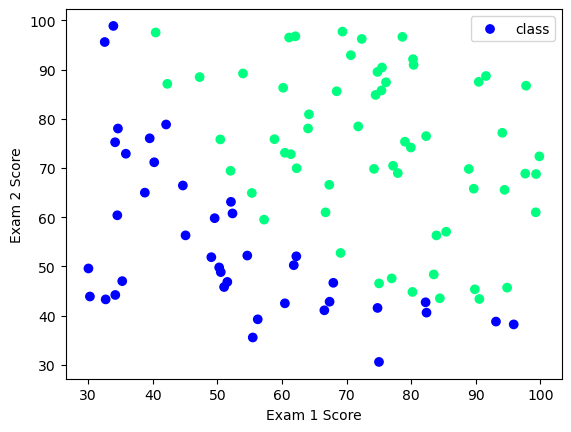

In [32]:
# Plot data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.winter, marker='o')

# Customizing the plot
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.show()

### Sigmoid function

For logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

In [37]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

* For large positive values, sigmoid function always gives the answer near to 1
* For large negative values, sigmoid function always gives the answer near to 0
* For value = 0, sigmoid function always gives the answer equal to 0.5

In [38]:
# Let's check our sigmoid
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


### Cost function for logistic regression


For logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] $$

where

* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$
    


In [39]:
def compute_cost(X, y, w, b):
    m, n = X.shape
    cost = 0
    
    
    for i in range(m):
        z_i = np.dot(w,X[i]) + b
        f_wb_i = sigmoid(z_i)
        cost += (-y[i]*np.log(f_wb_i)) - (1-y[i])*(np.log(1-f_wb_i))
    total_cost = cost / m
        

    return total_cost

* Loss function computes the difference of a data point's y_actual and y_predicted
* Cost function is the sum of all the losses of the data points.

In [40]:
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


### Gradient for logistic regression

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

In [43]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.


    for i in range(m):
        # Calculate the linear combination of weights and features plus bias
        z_wb = np.dot(X[i], w) + b
        
        # Calculate the sigmoid activation function
        f_wb = 1.0 / (1.0 + np.exp(-z_wb))
        
        # Compute the gradient of the cost w.r.t. b
        dj_db_i = -(y[i] - f_wb)
        dj_db += dj_db_i
        
        # Compute the gradient of the cost w.r.t. w
        for j in range(n):
            dj_dw[j] += X[i][j] * dj_db_i
            
    dj_dw /= m
    dj_db /= m


        
    return dj_db, dj_dw

In [44]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


### Tuning parameters using gradient descent

In [46]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
   
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [47]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


### Evaluating the predictions

In [50]:
def predict(X, w, b): 
  
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   

    # Loop over each example
    for i in range(m):   
        # Calculate the linear combination of weights and features plus bias
        z_wb = np.dot(X[i], w) + b
        
        # Calculate the sigmoid activation function
        f_wb = 1.0 / (1.0 + np.exp(-z_wb))

        # Apply the threshold at 0.5 to make binary predictions
        p[i] = 1 if f_wb >= 0.5 else 0
        

    return p

In [52]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


# Thank You!